In [1]:
import os

In [14]:
#Creating base folders
def Create_folders()->None:
    '''function docstring'''
    os.mkdir('D:\\datasets\\Human_faces_2\\faces\\reduced_men')
    os.mkdir('D:\\datasets\\Human_faces_2\\faces\\ready_to_gen')
    os.mkdir('D:\\datasets\\Human_faces_2\\faces\\ready_to_gen\\train')
    os.mkdir('D:\\datasets\\Human_faces_2\\faces\\ready_to_gen\\train\\men')
    os.mkdir('D:\\datasets\\Human_faces_2\\faces\\ready_to_gen\\train\\women')
    os.mkdir('D:\\datasets\\Human_faces_2\\faces\\ready_to_gen\\valid')
    os.mkdir('D:\\datasets\\Human_faces_2\\faces\\ready_to_gen\\valid\\men')
    os.mkdir('D:\\datasets\\Human_faces_2\\faces\\ready_to_gen\\valid\\women')
try :
    Create_folders()
    print('All done')
except :
    print('something wrong when running the function')

All done


In [15]:
#Because number of men samples is bigger than women so I reduced number of men samples to women samples length .
from shutil import copyfile
from random import sample
selected_men = sample(os.listdir('D:\\datasets\\Human_faces_2\\faces\\man'),len(os.listdir('D:\\datasets\\Human_faces_2\\faces\\woman')))
for pic in selected_men :
    copyfile(f'D:\\datasets\\Human_faces_2\\faces\\man\\{pic}',f'D:\\datasets\\Human_faces_2\\faces\\reduced_men\\{pic}')
print('All done')

All done


In [16]:
#Splitting dataset to train and validation (90% for training)
from tensorflow.keras.preprocessing.image import load_img
def Split_data(base_dir,train_dir,valid_dir,split_size)->None :
    '''function docstring'''
    split = (split_size*len(os.listdir(base_dir)))//100
    selected_pictures = sample(os.listdir(base_dir),split)
    for pic in os.listdir(base_dir) :
        try :
            load_img(f'{base_dir}\\{pic}')
            if pic in selected_pictures :
                copyfile(f'{base_dir}\\{pic}',f'{train_dir}\\{pic}')
            else :
                copyfile(f'{base_dir}\\{pic}',f'{valid_dir}\\{pic}')
        except :
            print(f'{pic} is zero length , sp ignoring')
train_path_men = 'D:\\datasets\\Human_faces_2\\faces\\ready_to_gen\\train\\men'
valid_path_men = 'D:\\datasets\\Human_faces_2\\faces\\ready_to_gen\\valid\\men'
train_path_women = 'D:\\datasets\\Human_faces_2\\faces\\ready_to_gen\\train\\women'
valid_path_women = 'D:\\datasets\\Human_faces_2\\faces\\ready_to_gen\\valid\\women'
men_path = 'D:\\datasets\\Human_faces_2\\faces\\reduced_men'
women_path  = 'D:\\datasets\\Human_faces_2\\faces\\woman'
try :
    Split_data(men_path,train_path_men,valid_path_men,90)
    Split_data(women_path,train_path_women,valid_path_women,90)
    print('All done')
except :
    print('something wrong when running the function')

All done


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rescale=1/255,rotation_range=40,horizontal_flip=True)
valid_gen = ImageDataGenerator(rescale=1/255)

In [18]:
#Generating data
ready_train = train_gen.flow_from_directory('D:\\datasets\\Human_faces_2\\faces\\ready_to_gen\\train',target_size=(100,100),batch_size=171,class_mode='binary')
ready_valid = valid_gen.flow_from_directory('D:\\datasets\\Human_faces_2\\faces\\ready_to_gen\\valid',target_size=(100,100),batch_size=38,class_mode='binary')

Found 17080 images belonging to 2 classes.
Found 1898 images belonging to 2 classes.


In [7]:
#Creating network
from tensorflow.keras import Model , layers
from tensorflow.keras.applications import InceptionV3
def Create_model()->None:
    '''function docstring'''
    inc = InceptionV3(include_top=False,input_shape=(100,100,3))
    for layer in inc.layers :
        layer.trainable = False
    last_layer = inc.get_layer('mixed7')
    last_out = last_layer.output
    x = layers.Flatten()(last_out)
    x = layers.Dense(1024,activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(1,activation='sigmoid')(x)
    model = Model(inc.input,x)
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    return model
print('All done')

All done


In [8]:
#Training
history = Create_model().fit(ready_train,epochs=30,validation_data=ready_valid)

Epoch 1/30
100/100 [==============================] - 411s 4s/step - loss: 0.8040 - accuracy: 0.7766 - val_loss: 0.3253 - val_accuracy: 0.8599
Epoch 2/30
100/100 [==============================] - 293s 3s/step - loss: 0.3604 - accuracy: 0.8394 - val_loss: 0.2857 - val_accuracy: 0.8725
Epoch 3/30
100/100 [==============================] - 286s 3s/step - loss: 0.3224 - accuracy: 0.8594 - val_loss: 0.2661 - val_accuracy: 0.8925
Epoch 4/30
100/100 [==============================] - 286s 3s/step - loss: 0.3051 - accuracy: 0.8689 - val_loss: 0.3434 - val_accuracy: 0.8498
Epoch 5/30
100/100 [==============================] - 286s 3s/step - loss: 0.2843 - accuracy: 0.8757 - val_loss: 0.2680 - val_accuracy: 0.8888
Epoch 6/30
100/100 [==============================] - 297s 3s/step - loss: 0.2716 - accuracy: 0.8823 - val_loss: 0.2624 - val_accuracy: 0.8888
Epoch 7/30
100/100 [==============================] - 294s 3s/step - loss: 0.2661 - accuracy: 0.8886 - val_loss: 0.2467 - val_accuracy: 0.8983

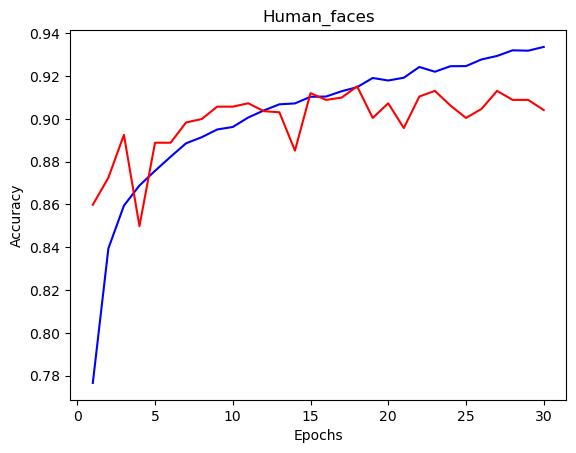

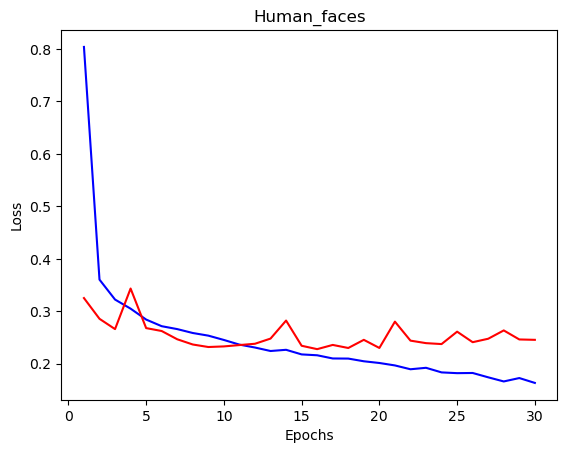

In [13]:
#Visualize models performance
import matplotlib.pyplot as plt
epoch = range(1,31)
results = history.history
plt.plot(epoch,results['accuracy'],'blue')
plt.plot(epoch,results['val_accuracy'],'red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Human_faces')
plt.show()
plt.plot(epoch,results['loss'],'blue')
plt.plot(epoch,results['val_loss'],'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Human_faces')
plt.show()